# Introduction to Machine Learning and Data Science: Machine Learning basics with Diabetes and Aquatic Toxicity datasets

This notebook contains exercises for an introductory course on Machine Learning and Data Science, focusing on a regression and a classification problem with the QSAR Aquatic Toxicity and the Pima Indians Diabetes datasets, respectively.

We will cover essential steps in understanding, cleaning, transforming, and analyzing the data using pandas and matplotlib/seaborn. The exercises are divided into basic, intermediate, and advanced levels.

**Estimated Time**: 2 Hours



## Setup

We already used the Diabetes dataset last week, but here are the names of the columns, since it comes without them:
1. Pregnancies
2. Glucose
3. BloodPressure
4. SkinThickness
5. Insulin
6. BMI
7. DiabetesPedigreeFunction
8. Age
9. Outcome (0 for no diabetes, 1 for diabetes)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# URL for the Pima Indians Diabetes dataset
url_classification = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names_classification = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Load the dataset
diabetes_df = pd.read_csv(url_classification, names=names_classification)

# Display the first few rows to confirm loading
diabetes_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For the regression dataset, we will use the QSAR Aquatic Toxicity dataset, which was used to develop a quantitative structure-activity relationship models to predict aquatic toxicity towards the fish Pimephales promelas (fathead minnow). LC50, which is the concentration that causes death in 50% of test Daphnia Magma over a test duration of 48 hours, is the target.

In [2]:
url_regression = "https://raw.githubusercontent.com/readytensor/rt-datasets-regression/refs/heads/main/datasets/processed/aquatic_toxicity/aquatic_toxicity.csv"

aquatic_toxicity_df = pd.read_csv(url_regression)
aquatic_toxicity_df.head()

,Id,TPSA(Tot),SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


## Basic Exercisess (Approx. 45-60 minutes)

These exercises focus on the most basic fundamentals of the machine learning pipeline.

### Exercise 1: Splitting the Data

1. Separate features (`X`) and target (`y`).
2. Perform the data splitting with the `sklearn.model_selection.train_test_split`. Get the training, validation and test sets with a 60/20/20  split. **Only for classification dataset**: perform the splitting with the `stratify` option set to yes. It attempts to keep the percentages of the classes in the different sets.
3. Print the shape of both sets, to see how many attributes and samples there are in each.

In [3]:
# Your code for Exercise 1.1
from sklearn.model_selection import train_test_split

#Classification
classification_train_set, classification_test_set = train_test_split(diabetes_df, test_size=0.2, random_state=42)
classification_train_set, classification_val_set = train_test_split(classification_train_set, test_size=0.25, random_state=42)
print(f"There are {len(classification_train_set)} instances in the training set, {len(classification_test_set)} in the test set, and {len(classification_val_set)} in the validation set")

y_classification = classification_train_set["Outcome"]
x_classification_train_set = classification_train_set.drop("Outcome", axis=1)


#Regression
regression_train_set, regression_test_set = train_test_split(aquatic_toxicity_df, test_size=0.2, random_state=42)
regression_train_set, regression_val_set = train_test_split(regression_train_set, test_size=0.25, random_state=42)
print(f"There are {len(regression_train_set)} instances in the training set, {len(regression_test_set)} in the test set, and {len(regression_val_set)} in the validation set")

y_regression = regression_train_set["LC50"]
x_regression_train_set = regression_train_set.drop("LC50", axis=1)

There are 460 instances in the training set, 154 in the test set, and 154 in the validation set
There are 327 instances in the training set, 110 in the test set, and 109 in the validation set


In [4]:
# Your code for Exercise 1.2


In [5]:
# Your code for Exercise 1.3
print("y_classification", y_classification.shape)
print("x_classification_train_set", x_classification_train_set.shape)
print("classification_test_set", classification_test_set.shape)
print("classification_val_set", classification_val_set.shape)

print("y_regression", y_regression.shape)
print("x_regression_train_set", x_regression_train_set.shape)
print("regression_test_set", regression_test_set.shape)
print("regression_val_set", regression_val_set.shape)

y_classification (460,)
x_classification_train_set (460, 8)
classification_test_set (154, 9)
classification_val_set (154, 9)
y_regression (327,)
x_regression_train_set (327, 9)
regression_test_set (110, 10)
regression_val_set (109, 10)


### Exercise 2: Training your first models
1. Train `LinearRegression` on the regression dataset (Aquatic Toxicity).
2. Train `LogisticRegression` on the classification dataset (Diabetes).
3. Predict on the test set for each.
4. Print first 5 predictions.

In [7]:
# Your code for Exercise 2.1
from sklearn.linear_model import LinearRegression, LogisticRegression

# 1. Train LinearRegression on Aquatic Toxicity dataset
# Prepare regression data
y_regression_train = regression_train_set["LC50"]
X_regression_train = regression_train_set.drop("LC50", axis=1)
X_regression_test = regression_test_set.drop("LC50", axis=1)
y_regression_test = regression_test_set["LC50"]

# Create and train model
lin_reg = LinearRegression()
lin_reg.fit(X_regression_train, y_regression_train)

# Make predictions
regression_predictions = lin_reg.predict(X_regression_test)


In [8]:
# Your code for Exercise 2.2

# 2. Train LogisticRegression on Diabetes dataset
# Prepare classification data
y_classification_train = classification_train_set["Outcome"]
X_classification_train = classification_train_set.drop("Outcome", axis=1)
X_classification_test = classification_test_set.drop("Outcome", axis=1)
y_classification_test = classification_test_set["Outcome"]

# Create and train model
log_reg = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
log_reg.fit(X_classification_train, y_classification_train)

# Make predictions
classification_predictions = log_reg.predict(X_classification_test)


In [9]:
# Your code for Exercise 2.3
# 3-4. Print first 5 predictions for each
print("\nRegression (Aquatic Toxicity) - First 5 predictions:")
print(regression_predictions[:5])

print("\nClassification (Diabetes) - First 5 predictions:")
print(classification_predictions[:5])


Regression (Aquatic Toxicity) - First 5 predictions:
[3.48215926 4.67673874 4.08281244 4.34547864 3.99747216]

Classification (Diabetes) - First 5 predictions:
[0 0 0 0 0]


### Exercise 3: Evaluate your models
1. For regression, use the following metrics to check how good your predictions were: `mean_squared_error`, `r2_score`.
2. Do the same for classification for these: `accuracy_score`, `confusion_matrix`
3. Interpret: Are predictions close? For classification, is there a clear tendency in the model (too many false positives, false negatives, etc.)?

In [11]:
# Your code for Exercise 3.1
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
import numpy as np

# Regression Evaluation
print("="*50)
print("REGRESSION EVALUATION (Aquatic Toxicity)")
print("="*50)

# Calculate metrics
mse = mean_squared_error(y_regression_test, regression_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_regression_test, regression_predictions)

print(f"\nMean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R-squared Score: {r2:.4f}")

# Compare first 5 predictions with actual values
print("\nFirst 5 predictions vs actual values:")
for pred, actual in zip(regression_predictions[:5], y_regression_test[:5]):
    print(f"Predicted: {pred:.4f} | Actual: {actual:.4f} | Difference: {abs(pred-actual):.4f}")

# Classification Evaluation
print("\n" + "="*50)
print("CLASSIFICATION EVALUATION (Diabetes)")
print("="*50)

# Calculate metrics
accuracy = accuracy_score(y_classification_test, classification_predictions)
conf_matrix = confusion_matrix(y_classification_test, classification_predictions)

print(f"\nAccuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Breakdown of confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
print(f"\nTrue Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

# Compare first 5 predictions with actual values
print("\nFirst 5 predictions vs actual values:")
for pred, actual in zip(classification_predictions[:5], y_classification_test[:5]):
    print(f"Predicted: {pred} | Actual: {actual} | {'CORRECT' if pred == actual else 'WRONG'}")

REGRESSION EVALUATION (Aquatic Toxicity)

Mean Squared Error: 1.4843
Root Mean Squared Error: 1.2183
R-squared Score: 0.4661

First 5 predictions vs actual values:
Predicted: 3.4822 | Actual: 2.0720 | Difference: 1.4102
Predicted: 4.6767 | Actual: 6.8480 | Difference: 2.1713
Predicted: 4.0828 | Actual: 3.9020 | Difference: 0.1808
Predicted: 4.3455 | Actual: 6.1020 | Difference: 1.7565
Predicted: 3.9975 | Actual: 4.0380 | Difference: 0.0405

CLASSIFICATION EVALUATION (Diabetes)

Accuracy: 0.7273
Confusion Matrix:
[[76 23]
 [19 36]]

True Negatives: 76
False Positives: 23
False Negatives: 19
True Positives: 36

First 5 predictions vs actual values:
Predicted: 0 | Actual: 0 | CORRECT
Predicted: 0 | Actual: 0 | CORRECT
Predicted: 0 | Actual: 0 | CORRECT
Predicted: 0 | Actual: 0 | CORRECT
Predicted: 0 | Actual: 0 | CORRECT


In [ ]:
# Your code for Exercise 3.2

## Intermediate Exercises (Approx. 45-60 minutes)

These exercises focus on comparing the performance of multiple models, performing cross-validation and using visualization techniques to understand better the results.

### Exercise 4: Compare multiple models
1. For the regression problem: Train and compare `LinearRegression`(already done), `DecisionTreeRegressor`, and `KNeighborsRegressor`.
2. For the classification problem: Train and compare `LogisticRegression` (already done), `KNeighborsClassifier`, and `DecisionTreeClassifier`.
3. Evaluate using R² score and accuracy each, respectively.
4. Which model performs best in each case? Why do you think that might be? Try to understand how the models work. Here is the documentation for each of them:
  - [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
  - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
  - [KNeighborRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)
  - [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
  - [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
  - [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [12]:
# Your code for Exercise 4.1
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

# Regression Models Comparison
print("="*50)
print("REGRESSION MODELS COMPARISON")
print("="*50)

# 1. Linear Regression (already trained)
lin_reg_r2 = r2_score(y_regression_test, regression_predictions)

# 2. Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_regression_train, y_regression_train)
tree_reg_pred = tree_reg.predict(X_regression_test)
tree_reg_r2 = r2_score(y_regression_test, tree_reg_pred)

# 3. K-Neighbors Regressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_regression_train, y_regression_train)
knn_reg_pred = knn_reg.predict(X_regression_test)
knn_reg_r2 = r2_score(y_regression_test, knn_reg_pred)

# Print regression results
print("\nR² Scores:")
print(f"Linear Regression: {lin_reg_r2:.4f}")
print(f"Decision Tree: {tree_reg_r2:.4f}")
print(f"K-Neighbors: {knn_reg_r2:.4f}")

# Classification Models Comparison
print("\n" + "="*50)
print("CLASSIFICATION MODELS COMPARISON")
print("="*50)

# 1. Logistic Regression (already trained)
log_reg_acc = accuracy_score(y_classification_test, classification_predictions)

# 2. Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_classification_train, y_classification_train)
tree_clf_pred = tree_clf.predict(X_classification_test)
tree_clf_acc = accuracy_score(y_classification_test, tree_clf_pred)

# 3. K-Neighbors Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_classification_train, y_classification_train)
knn_clf_pred = knn_clf.predict(X_classification_test)
knn_clf_acc = accuracy_score(y_classification_test, knn_clf_pred)

# Print classification results
print("\nAccuracy Scores:")
print(f"Logistic Regression: {log_reg_acc:.4f}")
print(f"Decision Tree: {tree_clf_acc:.4f}")
print(f"K-Neighbors: {knn_clf_acc:.4f}")

# Best performing models
best_reg = max([("Linear", lin_reg_r2), ("Decision Tree", tree_reg_r2), ("KNN", knn_reg_r2)], key=lambda x: x[1])
best_clf = max([("Logistic", log_reg_acc), ("Decision Tree", tree_clf_acc), ("KNN", knn_clf_acc)], key=lambda x: x[1])

print("\n" + "="*50)
print(f"Best Regression Model: {best_reg[0]} (R² = {best_reg[1]:.4f})")
print(f"Best Classification Model: {best_clf[0]} (Accuracy = {best_clf[1]:.4f})")
print("="*50)

REGRESSION MODELS COMPARISON

R² Scores:
Linear Regression: 0.4661
Decision Tree: 0.2086
K-Neighbors: -0.1844

CLASSIFICATION MODELS COMPARISON

Accuracy Scores:
Logistic Regression: 0.7273
Decision Tree: 0.6494
K-Neighbors: 0.6883

Best Regression Model: Linear (R² = 0.4661)
Best Classification Model: Logistic (Accuracy = 0.7273)


In [ ]:
# Your code for Exercise 4.2

In [ ]:
# Your code for Exercise 4.3

### Exercise 5: Cross-validation
1. Use `cross_val_score` for the best model in each case, with `cv=5`.
2. For classification, try both `accuracy` and `f1` as scoring methods, to compare the trainings in the cross-validation.
3. For the regression, use both `r2` and `neg_mean_squared_error`.
4. Print mean + std of the scores.

In [14]:
# Your code for Exercise 5.1 and 5.2
from sklearn.model_selection import cross_val_score
import numpy as np

# ======================
# 1. LINEAR REGRESSION (Best Regression Model)
# ======================
print("=" * 50)
print("CROSS-VALIDATION FOR LINEAR REGRESSION")
print("=" * 50)

# R² Score (Higher is better)
r2_scores = cross_val_score(
    LinearRegression(), 
    X_regression_train, 
    y_regression_train, 
    cv=5, 
    scoring='r2'
)
print("\nR² Scores (Higher is better):")
print(f"Individual Scores: {r2_scores.round(4)}")
print(f"Mean R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")

# Negative MSE (We convert to positive MSE for interpretation)
neg_mse_scores = cross_val_score(
    LinearRegression(), 
    X_regression_train, 
    y_regression_train, 
    cv=5, 
    scoring='neg_mean_squared_error'
)
mse_scores = -neg_mse_scores  # Convert to positive MSE
print("\nMSE Scores (Lower is better):")
print(f"Individual MSEs: {mse_scores.round(4)}")
print(f"Mean MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")

# ======================
# 2. LOGISTIC REGRESSION (Best Classification Model)
# ======================
print("\n" + "=" * 50)
print("CROSS-VALIDATION FOR LOGISTIC REGRESSION")
print("=" * 50)

# Accuracy (Higher is better)
accuracy_scores = cross_val_score(
    LogisticRegression(max_iter=1000), 
    X_classification_train, 
    y_classification_train, 
    cv=5, 
    scoring='accuracy'
)
print("\nAccuracy Scores (Higher is better):")
print(f"Individual Accuracies: {accuracy_scores.round(4)}")
print(f"Mean Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")

# F1-Score (Better for imbalanced classes)
f1_scores = cross_val_score(
    LogisticRegression(max_iter=1000), 
    X_classification_train, 
    y_classification_train, 
    cv=5, 
    scoring='f1'
)
print("\nF1 Scores (Higher is better, good for imbalance):")
print(f"Individual F1: {f1_scores.round(4)}")
print(f"Mean F1: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")

CROSS-VALIDATION FOR LINEAR REGRESSION

R² Scores (Higher is better):
Individual Scores: [0.448  0.4518 0.3696 0.3321 0.4631]
Mean R²: 0.4129 ± 0.0523

MSE Scores (Lower is better):
Individual MSEs: [1.4398 1.2885 1.8479 1.6379 1.4751]
Mean MSE: 1.5379 ± 0.1907

CROSS-VALIDATION FOR LOGISTIC REGRESSION

Accuracy Scores (Higher is better):
Individual Accuracies: [0.7283 0.75   0.7283 0.7609 0.7717]
Mean Accuracy: 0.7478 ± 0.0174

F1 Scores (Higher is better, good for imbalance):
Individual F1: [0.5455 0.623  0.5902 0.5926 0.6441]
Mean F1: 0.5990 ± 0.0334


In [ ]:
# Your code for Exercise 5.1 and 5.3

In [ ]:
# Your code for Exercise 5.4

### Exercise 6: Classification report and visualization

1. Use the `classification_report` function for the classification problem ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) to documentation)
2. Calculate the confusion matrix and plot it using `ConfusionMatrixDisplay`.

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154


CONFUSION MATRIX
[[76 23]
 [19 36]]


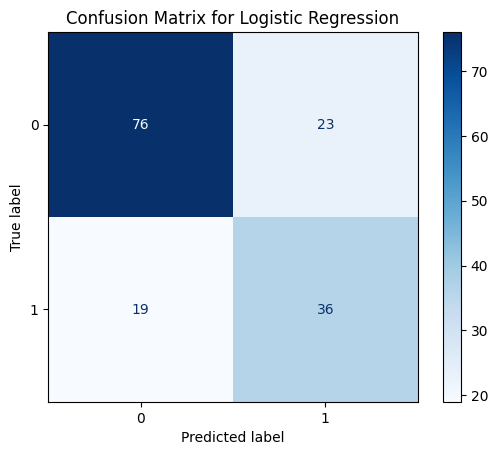

In [15]:
# Your code for Exercise 6.1

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Train the best classifier (Logistic Regression) on full training data
best_clf = LogisticRegression(max_iter=1000)
best_clf.fit(X_classification_train, y_classification_train)

# 2. Predict on test set
y_pred = best_clf.predict(X_classification_test)

# 3. Generate classification report
print("="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_classification_test, y_pred))

# 4. Calculate and plot confusion matrix
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_classification_test, y_pred)
print(cm)

# 5. Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_clf.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
# Your code for Exercise 6.2

## Advanced Exercises (Approx. 45-60 min)

These exercises explore hyperparameter tuning methods and final model evaluation.



### Exercise 7: Hyperparameter tuning using Grid Search

1. Use `GridSearchCV` with `LogisticRegression`. Try this grid: `C=[0.01, 0.1, 1, 10]`, `penalty=['l1', 'l2']`, `solver='liblinear'`.
2. You can also run a cross validation with this function. Try a `cv=5`.
3. Print what the best parameters and score were.

`GridSearchCV` documentation: [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [16]:
# Your code for Exercise 7.1
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy',  # can change to 'f1' if preferred
    verbose=1,
    n_jobs=-1  # uses all available CPU cores
)

# Perform the grid search
grid_search.fit(X_classification_train, y_classification_train)

# Print the best parameters and score
print("="*50)
print("GRID SEARCH RESULTS")
print("="*50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score (accuracy): {grid_search.best_score_:.4f}")

# Evaluate on test set with best model
best_logreg = grid_search.best_estimator_
test_score = best_logreg.score(X_classification_test, y_classification_test)
print(f"Test set accuracy with best model: {test_score:.4f}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GRID SEARCH RESULTS
Best parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score (accuracy): 0.7500
Test set accuracy with best model: 0.7273


In [ ]:
# Your code for Exercise 7.2

In [ ]:
# Your code for Exercise 7.3

### Exercise 8: Hyperparameter tuning using Random Search

1. Use `RandomizedSearchCV` on the [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) model (for regression). Sample only one parameter: `alpha` from `scipy.stats.uniform(0.01, 10)`.
2. Limit the random search to only 10 iterations.
3. Print the best alpha and score.

In [17]:
# Your code for Exercise 8.1
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Define the parameter distribution
param_dist = {
    'alpha': uniform(0.01, 10)  # Samples from uniform(0.01, 10.01)
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    Ridge(),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings sampled
    cv=5,
    scoring='r2',  # or 'neg_mean_squared_error' if preferred
    random_state=42,
    n_jobs=-1
)

# Perform the random search
random_search.fit(X_regression_train, y_regression_train)

# Print results
print("="*50)
print("RANDOMIZED SEARCH RESULTS (Ridge Regression)")
print("="*50)
print(f"Best alpha: {random_search.best_params_['alpha']:.4f}")
print(f"Best R² score: {random_search.best_score_:.4f}")

# Evaluate on test set
best_ridge = random_search.best_estimator_
test_score = best_ridge.score(X_regression_test, y_regression_test)
print(f"Test set R² with best model: {test_score:.4f}")

RANDOMIZED SEARCH RESULTS (Ridge Regression)
Best alpha: 3.7554
Best R² score: 0.4135
Test set R² with best model: 0.4705


In [ ]:
# Your code for Exercise 8.2

In [ ]:
# Your code for Exercise 8.3

### Exercise 9: Final model & test evaluation

1. Take the best model from Grid/Random search
2. Predict on test set
3. Print final metrics


In [18]:
# Your code for Exercise 9.1
# =============================================
# 1. CLASSIFICATION (Best Logistic Regression from GridSearchCV)
# =============================================
print("="*50)
print("FINAL CLASSIFICATION MODEL PERFORMANCE")
print("="*50)

# Get best classifier and predict
best_clf = grid_search.best_estimator_
y_pred_clf = best_clf.predict(X_classification_test)
y_pred_proba_clf = best_clf.predict_proba(X_classification_test)[:, 1]  # Probabilities for AUC

# Classification metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

print("\nClassification Report:")
print(classification_report(y_classification_test, y_pred_clf))

print("Confusion Matrix:")
print(confusion_matrix(y_classification_test, y_pred_clf))

print("\nKey Metrics:")
print(f"Accuracy: {accuracy_score(y_classification_test, y_pred_clf):.4f}")
print(f"F1 Score: {f1_score(y_classification_test, y_pred_clf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_classification_test, y_pred_proba_clf):.4f}")

# =============================================
# 2. REGRESSION (Best Ridge from RandomizedSearchCV)
# =============================================
print("\n" + "="*50)
print("FINAL REGRESSION MODEL PERFORMANCE")
print("="*50)

# Get best regressor and predict
best_reg = random_search.best_estimator_
y_pred_reg = best_reg.predict(X_regression_test)

# Regression metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("\nRegression Metrics:")
print(f"R² Score: {r2_score(y_regression_test, y_pred_reg):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_regression_test, y_pred_reg):.4f}")
print(f"Root MSE: {np.sqrt(mean_squared_error(y_regression_test, y_pred_reg)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_regression_test, y_pred_reg):.4f}")

# =============================================
# 3. Best Parameters Summary
# =============================================
print("\n" + "="*50)
print("BEST MODEL PARAMETERS SUMMARY")
print("="*50)
print("Classification (Logistic Regression):")
print(f"Best params: {grid_search.best_params_}")
print(f"CV Accuracy: {grid_search.best_score_:.4f}")

print("\nRegression (Ridge):")
print(f"Best alpha: {random_search.best_params_['alpha']:.4f}")
print(f"CV R²: {random_search.best_score_:.4f}")

FINAL CLASSIFICATION MODEL PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[76 23]
 [19 36]]

Key Metrics:
Accuracy: 0.7273
F1 Score: 0.6316
ROC AUC: 0.7978

FINAL REGRESSION MODEL PERFORMANCE

Regression Metrics:
R² Score: 0.4705
Mean Squared Error: 1.4719
Root MSE: 1.2132
Mean Absolute Error: 0.9165

BEST MODEL PARAMETERS SUMMARY
Classification (Logistic Regression):
Best params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
CV Accuracy: 0.7500

Regression (Ridge):
Best alpha: 3.7554
CV R²: 0.4135


In [ ]:
# Your code for Exercise 9.2

In [ ]:
# Your code for Exercise 9.3